## Working with Time series data in Python

## Contents:

- Datetime in Numpy
- Datetime in Pandas
- Time Resampling
- Time shifting
- Rolling and Expanding
- Basic Visualisations with pandas

## Datetime in Numpy

In [98]:
import numpy as np

In [3]:
np.array(['2023-03-20', '2023-03-19', '2023-03-18'])

array(['2023-03-20', '2023-03-19', '2023-03-18'], dtype='<U10')

we have defined a numpy array above with dates above. By default, numpy will treat each of these entries within the array as string. dtype='<U10' tells us that each is a Unicode string of length 10

In [4]:
np.array(['2023-03-20', '2023-03-19', '2023-03-18'], dtype='datetime64')

array(['2023-03-20', '2023-03-19', '2023-03-18'], dtype='datetime64[D]')

Now, we have specified that we want our array entries to be datetime. The letter 'D' tells us the level of precision of our datetime. In this case, 'D' means that our level of precision is day.

In [101]:
np.array(['2023-03-20', '2023-03-19', '2023-03-18'], dtype='datetime64[Y]')

array(['2023', '2023', '2023'], dtype='datetime64[Y]')

In [6]:
np.array(['2023-03-20', '2023-03-19', '2023-03-18'], dtype='datetime64[h]')

array(['2023-03-20T00', '2023-03-19T00', '2023-03-18T00'],
      dtype='datetime64[h]')

In [15]:
np.arange('2022-01-01', '2023-01-01', dtype='datetime64[M]')

array(['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12'],
      dtype='datetime64[M]')

In [17]:
np.arange('2022-01-01', '2023-01-01', 2, dtype='datetime64[M]')

array(['2022-01', '2022-03', '2022-05', '2022-07', '2022-09', '2022-11'],
      dtype='datetime64[M]')

## Datetime in Pandas

In [18]:
import pandas as pd

In [19]:
pd.date_range('2020-01-01', periods=7, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

### Convert to datetime

We can specify the format of our input data that is to be converted into a datetime  

In [23]:
pd.to_datetime(['2020-01-01','2020-01-02'])

DatetimeIndex(['2020-01-01', '2020-01-02'], dtype='datetime64[ns]', freq=None)

In [24]:
pd.to_datetime(['Jan 1, 2020', 'Jan 2, 2020'])

DatetimeIndex(['2020-01-01', '2020-01-02'], dtype='datetime64[ns]', freq=None)

In [22]:
pd.to_datetime(['2/1/23','3/1/23'])

DatetimeIndex(['2023-02-01', '2023-03-01'], dtype='datetime64[ns]', freq=None)

In [21]:
pd.to_datetime(['2/1/23','3/1/23'], format='%d/%m/%y')

DatetimeIndex(['2023-01-02', '2023-01-03'], dtype='datetime64[ns]', freq=None)

### Datetime in pandas dataframe

In [32]:
data = np.random.randn(4,1)
cols = ['value']
print(data)

[[-1.10170262]
 [ 0.547509  ]
 [ 1.1289717 ]
 [-2.11563991]]


In [35]:
idx = pd.date_range('2023-01-01', periods=4, freq='D')

df = pd.DataFrame(data, index=idx, columns=cols)
df

,value
2023-01-01,-1.101703
2023-01-02,0.547509
2023-01-03,1.128972
2023-01-04,-2.115640


In [36]:
df.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'], dtype='datetime64[ns]', freq='D')

In [37]:
df.index.max()

Timestamp('2023-01-04 00:00:00')

In [38]:
df.index.argmax()

3

### Time Resampling

Resampling is a critical technique that allows us to flexibly define the resolution of the data we want

#### resample()

A common operation with time series data is resampling based on the time series index. Let's see how to use the resample() method.

In [39]:
df = pd.read_csv('starbucks.csv')

In [40]:
df.head()

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340
3,2015-01-07,37.8848,9732554
4,2015-01-08,38.4961,13170548


In [49]:
df = pd.read_csv('starbucks.csv', index_col='Date')

In [50]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
Close     1006 non-null float64
Volume    1006 non-null int64
dtypes: float64(1), int64(1)
memory usage: 23.6+ KB


In [52]:
df.index

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=1006)

In [53]:
df = pd.read_csv('starbucks.csv', index_col='Date', parse_dates=True)

In [54]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [103]:
# Yearly Means
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


#### Custom Resampling Functions

We're not limited to pandas built-in summary functions (min/max/mean etc.). We can define our own function:

In [56]:
def first_day(entry):
    """
    Returns the first instance of the period, regardless of sampling rate.
    """
    if len(entry):  # handles the case of missing data
        return entry[0]

In [57]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


#### Plotting

In [59]:
%matplotlib inline

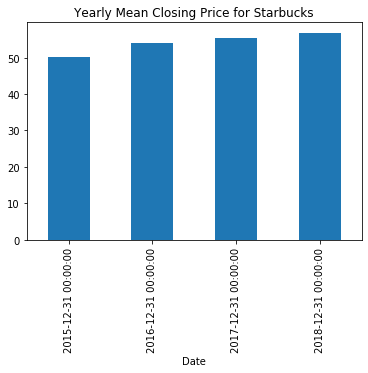

In [61]:
title = 'Yearly Mean Closing Price for Starbucks'
df['Close'].resample('A').mean().plot.bar(title=title,color=['#1f77b4']);

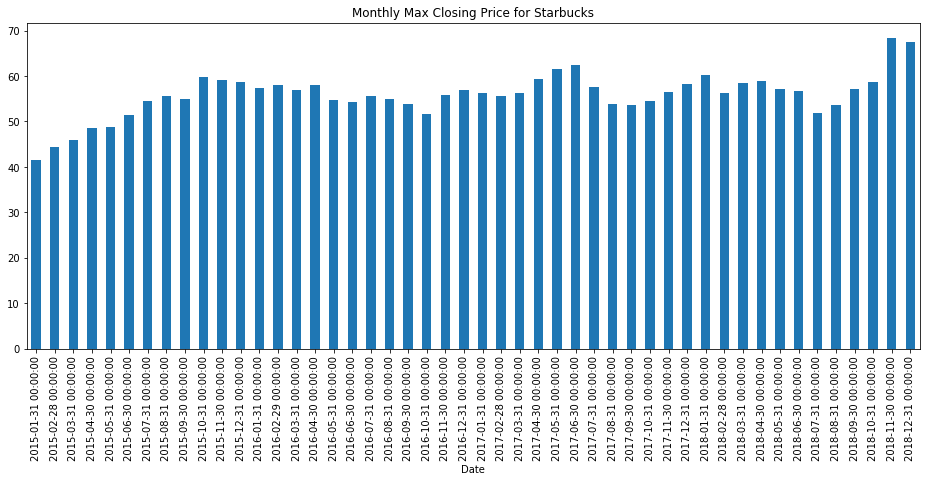

In [63]:
title = 'Monthly Max Closing Price for Starbucks'
df['Close'].resample('M').max().plot.bar(figsize=(16,6), title=title);

## Time Shifting
Sometimes you may need to shift all your data up or down along the time series index. A lot of pandas built-in methods do this under the hood.

In [105]:
df = pd.read_csv('starbucks.csv',index_col='Date',parse_dates=True)

In [106]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [68]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


### .shift() forward
This method shifts the entire date index a given number of rows, without regard for time periods (months & years).<br>It returns a modified copy of the original DataFrame.

In [69]:
df.shift(1).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [70]:
# NOTE: You will lose that last piece of data that no longer has an index!
df.shift(1).tail()

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


### .shift() backwards

In [71]:
df.shift(-1).head()

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0


In [72]:
df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


### Shifting based on Time Series Frequency Code

We can choose to shift <em>index values</em> up or down without realigning the data by passing in a <strong>freq</strong> argument.<br>
This method shifts dates to the next period based on a frequency code. Common codes are 'M' for month-end and 'A' for year-end.

In [74]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [73]:
# Shift everything forward one month
df.shift(periods=1, freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


# Rolling and Expanding

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a <em>simple moving average</em>. 

In [75]:
df = pd.read_csv('starbucks.csv', index_col='Date', parse_dates=True)

In [76]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


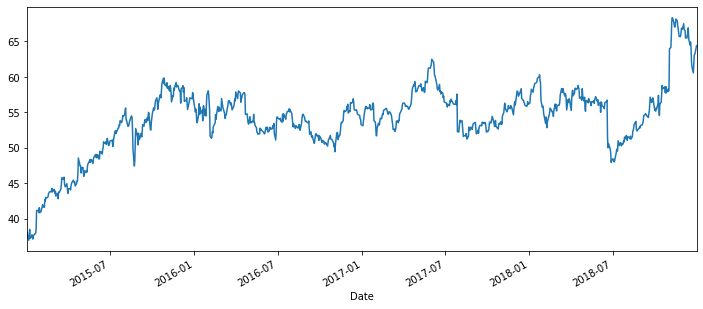

In [77]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

In [78]:
# 7 day rolling mean
df.rolling(window=7).mean().head(15)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


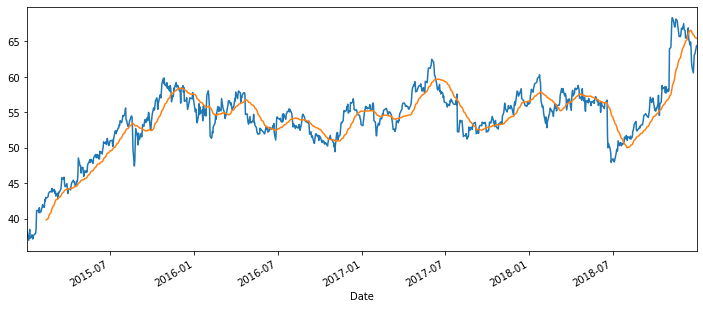

In [79]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=30).mean()['Close'].plot();

Adding a legend

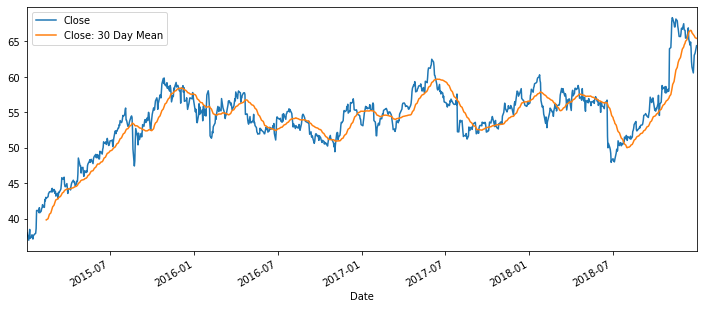

In [80]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

## Expanding

Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

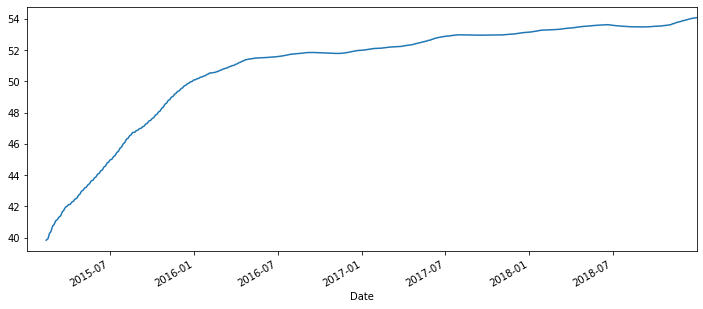

In [82]:
# df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

# Optional: specify a minimum number of periods to start from
df['Close'].expanding(min_periods=30).mean().plot(figsize=(12,5));

# Visualizing Time Series Data



In [112]:
df = pd.read_csv('starbucks.csv',index_col='Date',parse_dates=True)

In [85]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [86]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

First we'll create a line plot that puts both <tt>'Close'</tt> and <tt>'Volume'</tt> on the same graph.<br>Remember that we can use <tt>df.plot()</tt> in place of <tt>df.plot.line()</tt>

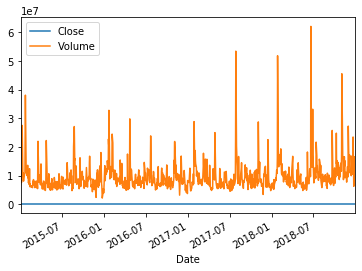

In [87]:
df.plot();

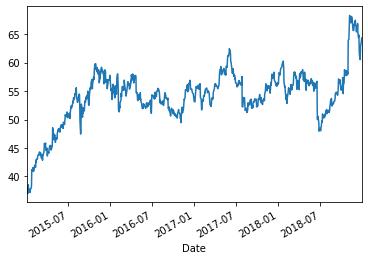

In [88]:
df['Close'].plot();

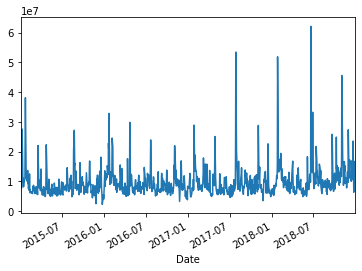

In [89]:
df['Volume'].plot();

# Plot Formatting

## Adding a title and axis labels

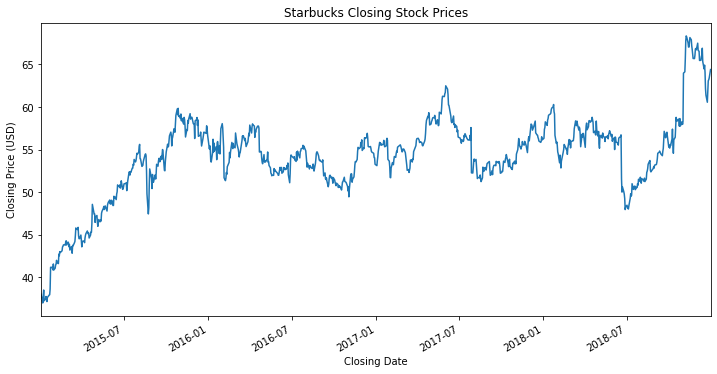

In [119]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(figsize=(12,6),title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

## X Limits
There are two ways we can set a specific span of time as an x-axis limit. We can plot a slice of the dataset, or we can pass x-limit values as an argument into <tt>df.plot()</tt>.

The advantage of using a slice is that pandas automatically adjusts the y-limits accordingly.

The advantage of passing in arguments is that pandas automatically tightens the x-axis. Plus, if we're also setting y-limits this can improve readability.

### Choosing X Limits by Slice:

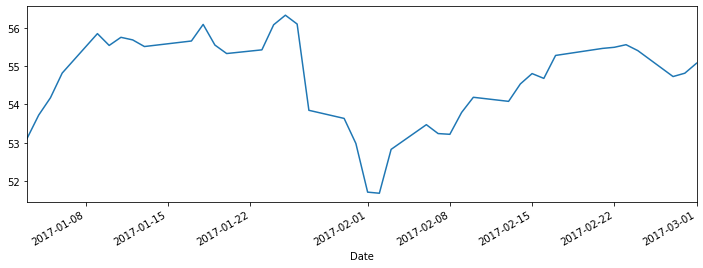

In [120]:
# Dates are separated by a colon:
df['Close']['2017-01-01':'2017-03-01'].plot(figsize=(12,4))

### Choosing X Limits by Argument:

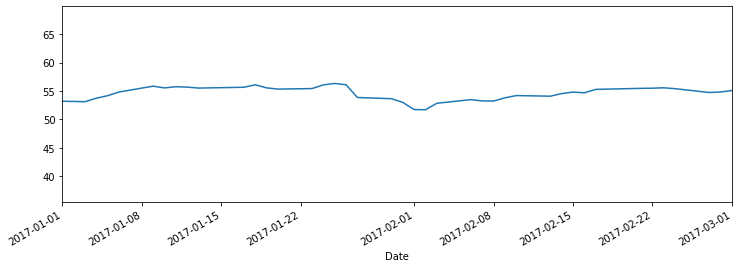

In [92]:
# Dates are separated by a comma:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01']);

let's focus on the y-axis limits to get a better sense of the shape of the data.<br>First we'll find out what upper and lower limits to use.

In [93]:
# FIND THE MINIMUM VALUE IN THE RANGE:
df.loc['2017-01-01':'2017-03-01']['Close'].min()

51.6899

In [94]:
# FIND THE MAXIMUM VALUE IN THE RANGE:
df.loc['2017-01-01':'2017-03-01']['Close'].max()

56.3244

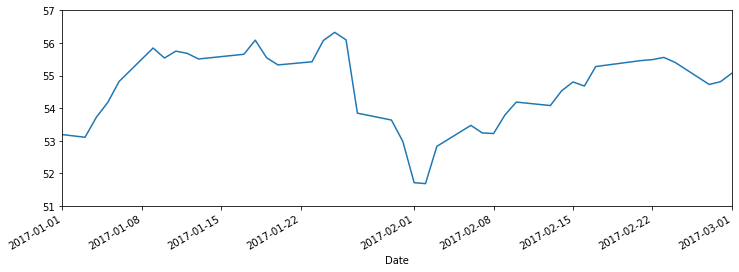

In [95]:
# PLUG THESE IN AS Y-LIMIT VALUES:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01'],ylim=[51,57]);

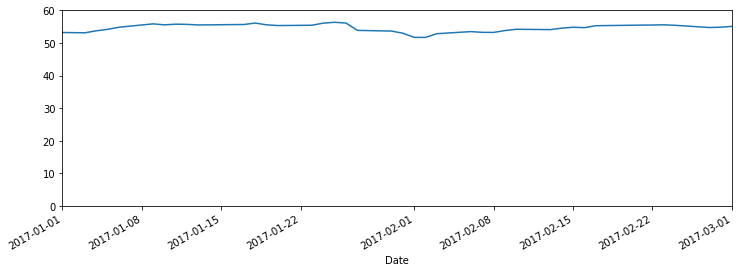

In [96]:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01'],ylim=[0,60]);

## Color and Style
We can pass arguments into <tt>.plot()</tt> to change the linestyle and color.

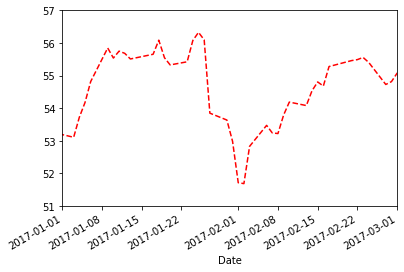

In [97]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],ls='--',c='r');